In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [5]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2, 500)).T

In [16]:
X

0      60.0
1      91.0
2      58.0
3      95.0
4      53.0
5      79.0
6      51.0
7     120.0
8      43.0
9     118.0
10     53.0
11     56.0
12     44.0
13     93.0
14     40.0
15    135.0
16     42.0
17    128.0
18     45.0
19     94.0
20     50.0
21    120.0
22     43.0
23    108.0
24     61.0
25     96.0
26     56.0
27    139.0
28     62.0
29     84.0
30     59.0
31     94.0
32     36.0
33    106.0
34     39.0
35    100.0
36     38.0
37     98.0
38     62.0
39    112.0
40     37.0
41     83.0
42     55.0
43     81.0
44     48.0
45    140.0
46     31.0
47    109.0
48     43.0
49     92.0
50     37.0
51    102.0
52     28.0
53    106.0
54     48.0
55     82.0
56     38.0
57    109.0
58     55.0
59    114.0
Name: X, dtype: float64

In [17]:
X[:, 0] = - X[:, 0]
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

KeyError: 'key of type tuple not found and not a MultiIndex'

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

[[ 0.74062812 -0.67191517]
 [ 0.67191517  0.74062812]]
[1.62123504 0.12581594]
[0.92798382 0.07201618]


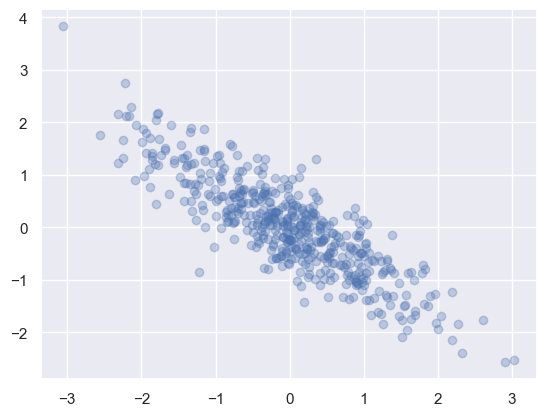

In [7]:
 
print(pca.components_)
 
print(pca.explained_variance_)
 
print(pca.explained_variance_ratio_)
 
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
 

In [8]:
for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
 
    ax = plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=4,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(-0.90, 1.2,'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1,-0.6,'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal');

In [9]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [10]:
X.shape

(500, 2)

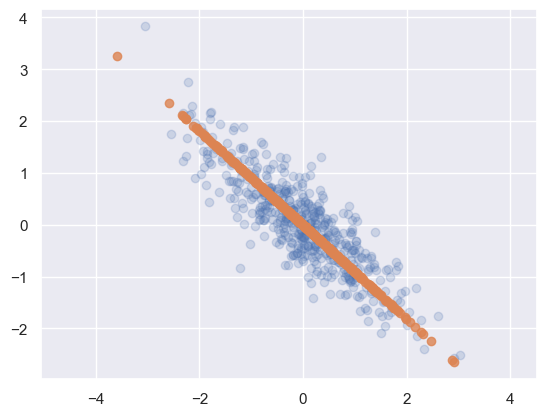

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2);
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs # import make_blobs directly from sklearn.datasets

In [13]:
X, y = make_blobs(n_samples=600, centers=5,
                  cluster_std=1, random_state=42)
 

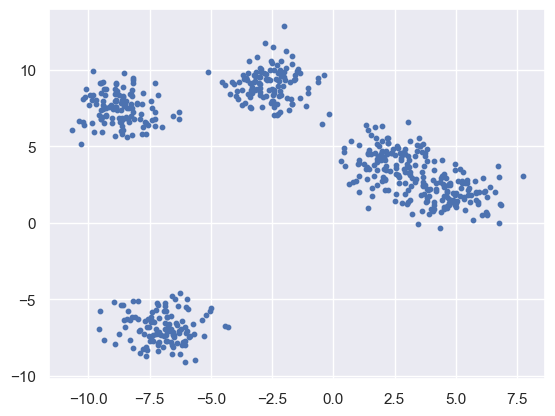

In [14]:
plt.scatter(X[:, 0], X[:, 1], s=10);

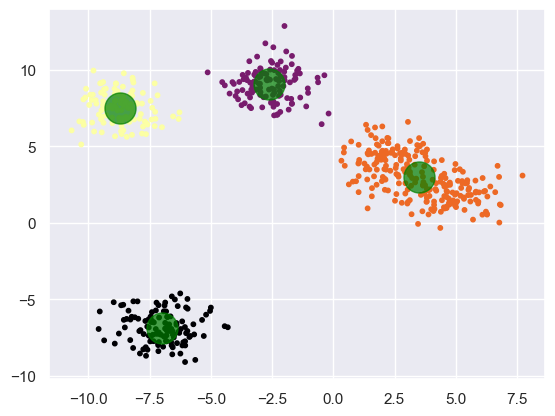

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


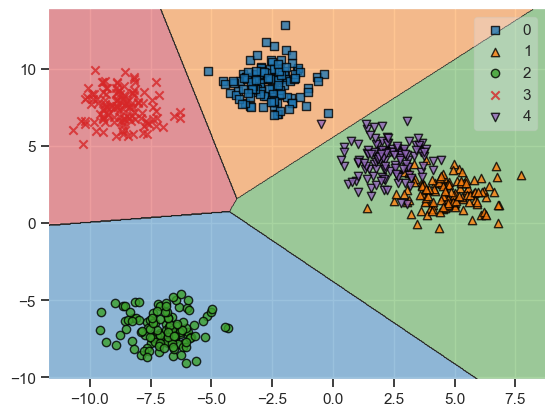

In [16]:
 
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=kmeans);

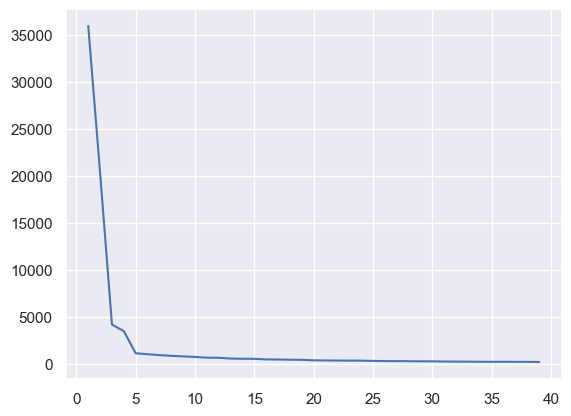

In [17]:
kmeans.inertia_
sse_ = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

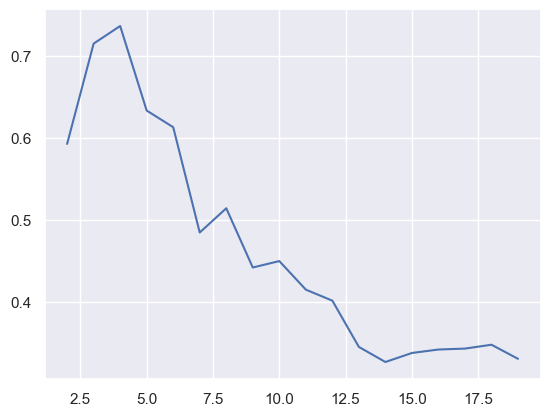

In [18]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);